In [1]:
# Comparions of Australia and Singapore

In [2]:
#plotly.offline doesn't push your charts to the clouds
import plotly
import plotly.offline as pyo
#allows us to create the Data and Figure objects
from plotly.graph_objs import *
#plotly.plotly pushes your charts to the cloud  

# import cufflings to easily plot pandas data frames
import cufflinks as cf

# work with cufflinks offline and set its theme
cf.go_offline()
cf.set_config_file(theme='white')

import pandas as pd
import numpy as np
import spacy
nlp = spacy.load('en_core_web_lg')

import warnings
warnings.filterwarnings('ignore')

# Text Similarity

In [3]:
sg = pd.read_excel('Science Primary Comparison.xlsx', 
                   'SG_2014',
                    encoding= 'unicode_escape')
aus = pd.read_csv('Science_AUS_2015.csv', 
                   'AUS_2015',
                   encoding= 'unicode_escape')

In [4]:
sg['text_parsed'] = list(nlp.pipe(sg['Text']))
aus['text_parsed'] = list(nlp.pipe(aus['text']))

In [5]:
sg['tokenized'] = sg['text_parsed'].apply(lambda doc: [str(t) for t in doc if not t.is_punct and not t.is_stop])
aus['tokenized'] = aus['text_parsed'].apply(lambda doc: [str(t) for t in doc if not t.is_punct and not t.is_stop])

In [6]:
sg['text_nostop'] = sg['text_parsed'].apply(lambda doc: nlp(" ".join([str(t) for t in doc if not t.is_stop and not t.is_punct])))
aus['text_nostop'] = aus['text_parsed'].apply(lambda doc: nlp(" ".join([str(t) for t in doc if not t.is_stop and not t.is_punct])))

In [7]:
idx = [0, 1, 5, 10, 60]
for i in idx:
    print("[{0}]".format(i), sg['text_parsed'].iloc[i])
    print()

[0] There is a great variety of living and non-living things in the world. Man seeks to organise this great variety of living and non-living things to better understand the world in which he lives. There are common threads that connect all living things and unifying factors in the diversity of non-living things that help him to classify them. This theme brings across the importance of maintaining diversity.

[1] Describe the characteristics of living things.

[5] Observe and compare the life cycles of plants grown from seeds over a period of time.

[10] Investigate the various ways in which plants reproduce and communicate findings.

[60] Identify good and poor conductors of heat.



In [8]:
for i in idx:
    print("[{0}]".format(i), aus['text_parsed'].iloc[i])
    print()

[0] Living things have a variety of external features

[1] Living things live in different places where their needs are met

[5] "Science involves observing, asking questions about, and describing changes in, objects and events"

[10] "Use a range of methods to sort information, including drawings and provided tables and through discussion, compare observations with predictions"

[60] "Light from a source forms shadows and can be absorbed, reflected and refracted"



In [9]:
for i in idx:
    print("[{0}]".format(i), sg['text_nostop'].iloc[i])
    print()

[0] great variety living non living things world Man seeks organise great variety living non living things better understand world lives common threads connect living things unifying factors diversity non living things help classify theme brings importance maintaining diversity

[1] Describe characteristics living things

[5] Observe compare life cycles plants grown seeds period time

[10] Investigate ways plants reproduce communicate findings

[60] Identify good poor conductors heat



In [10]:
for i in idx:
    print("[{0}]".format(i), aus['text_nostop'].iloc[i])
    print()

[0] Living things variety external features

[1] Living things live different places needs met

[5] Science involves observing asking questions describing changes objects events

[10] Use range methods sort information including drawings provided tables discussion compare observations predictions

[60] Light source forms shadows absorbed reflected refracted



In [11]:
print(sg['text_parsed'].iloc[10].similarity(aus['text_parsed'].iloc[60]))

0.782509037367099


In [12]:
print(sg['text_nostop'].iloc[10].similarity(aus['text_nostop'].iloc[60]))

0.5191778622589726


# LDA

In [19]:
import pandas as pd
import numpy as np
import spacy
nlp = spacy.load('en_core_web_lg')

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from pprint import pprint

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/qiusuwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
sg_words = list(sg['tokenized'])
aus_words = list(aus['tokenized'])

In [21]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [22]:
bigram = gensim.models.Phrases(sg['tokenized'], min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[sg['tokenized']], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

data_nouns_bigrams = make_bigrams(sg_words)
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_nouns_bigrams, allowed_postags=['NOUN'])

id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [31]:
lda_model_sg = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=8, 
                                               random_state=50,
                                               update_every=1,
                                               chunksize=500,
                                               passes=10,
                                               alpha='asymmetric',
                                               per_word_topics=True,
                                               )


In [32]:
pprint(lda_model_sg.print_topics())
doc_lda = lda_model_sg[corpus]

[(0,
  '0.069*"system" + 0.048*"energy" + 0.038*"plant" + 0.037*"organism" + '
  '0.032*"function" + 0.032*"part" + 0.032*"environment" + 0.027*"man" + '
  '0.022*"life" + 0.022*"interaction"'),
 (1,
  '0.154*"water" + 0.074*"cycle" + 0.063*"point" + 0.043*"state" + '
  '0.043*"life" + 0.022*"term" + 0.022*"boiling" + 0.022*"ice" + '
  '0.022*"freezing" + 0.022*"process"'),
 (2,
  '0.104*"thing" + 0.060*"food" + 0.057*"characteristic" + 0.041*"role" + '
  '0.041*"pathway" + 0.041*"producer" + 0.041*"predator" + 0.041*"chain" + '
  '0.041*"energy" + 0.041*"difference"'),
 (3,
  '0.109*"object" + 0.087*"heat" + 0.067*"light" + 0.065*"temperature" + '
  '0.046*"source" + 0.045*"factor" + 0.045*"survival" + 0.045*"organism" + '
  '0.024*"relate" + 0.024*"loss"'),
 (4,
  '0.083*"thing" + 0.057*"variety" + 0.056*"oxygen" + 0.056*"carbon" + '
  '0.056*"dioxide" + 0.054*"water" + 0.039*"diversity" + 0.039*"world" + '
  '0.039*"mixture" + 0.039*"air"'),
 (5,
  '0.058*"reproduction" + 0.057*"pla

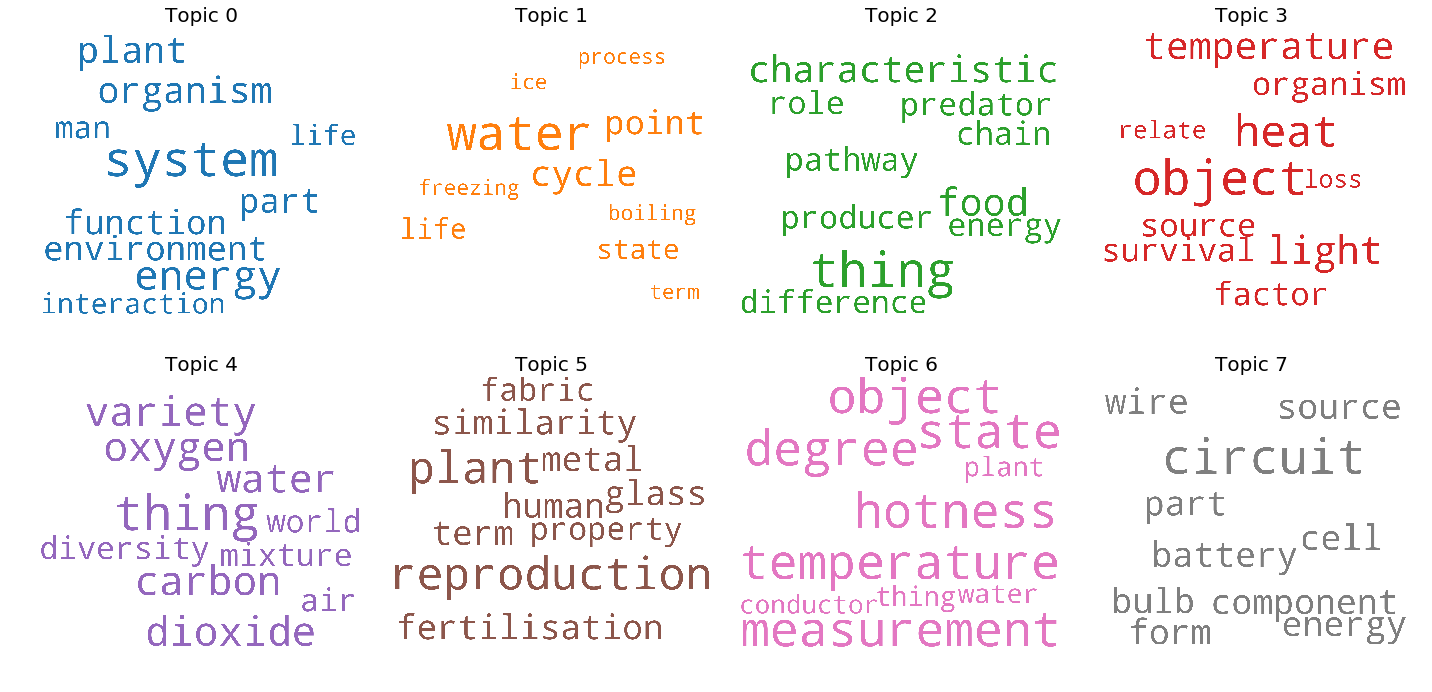

In [34]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
#rc('text', usetex=True)
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2000,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  min_font_size = 100,
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_sg.show_topics(formatted=False)

fig, axes = plt.subplots(2, 4, figsize=(20,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=20))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
